In [1]:
import seaborn
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import *

from wordcloud import WordCloud

from collections import Counter

try:
    import data_loader as dl
except ImportError:
    dl = None
    raise ImportError('data_loader' + ' not imported')

try:
    import constants as c
except ImportError:
    c = None
    raise ImportError('constants' + ' not imported')



In [2]:
import tensorflow as tf

# Variables

In [3]:
N_STRINGS = c.N_STRINGS
PATH = c.PATH
N_MOST_COMMON = c.N_MOST_COMMON

# Import

In [4]:
d_l = dl.DataLoader(PATH)

In [5]:
d_l.load()

In [6]:
ds_split = d_l.prepare()

In [7]:
ds_split

<ParallelMapDataset shapes: (None,), types: tf.string>

In [8]:
for x in ds_split.take(6).__iter__():
    tf.print(x)

["valkyria" "chronicles" "iii"]
["senj" "no" "valkyria" ... "chronicles" "japanese" "lit"]
["valkyria" "of" "the" ... "the" "playstation" "portable"]
["released" "in" "january" ... "the" "valkyria" "series"]
["employing" "the" "same" ... "unit" "calamaty" "raven"]
["the" "game" "began" ... "valkyria" "chronicles" "ii"]


# Frequencies

In [29]:
def cardinality_of_words(dataset):
    
    cardinalities = {}
    
    for seq in dataset.__iter__():
        for word in seq:
            word = word.numpy()
            if word not in cardinalities:
                cardinalities[word] = 1
            else:
                cardinalities[word] += 1
    
    return cardinalities

            

In [ ]:
cardinalities = cardinality_of_words(ds_split)

In [10]:
sorted_cardinalities = {k: v for k, v in sorted(cardinalities.items(), key = lambda item: item[1], reverse = True)}

In [ ]:
sorted_cardinalities

In [12]:
common_words = list(sorted_cardinalities.items())[:N_MOST_COMMON]

In [13]:
common_words[:6]

[(b'the', 130769),
 (b'of', 57032),
 (b'and', 50736),
 (b'in', 45017),
 (b'to', 39522),
 (b'a', 36545)]

In [37]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

## First Plot

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

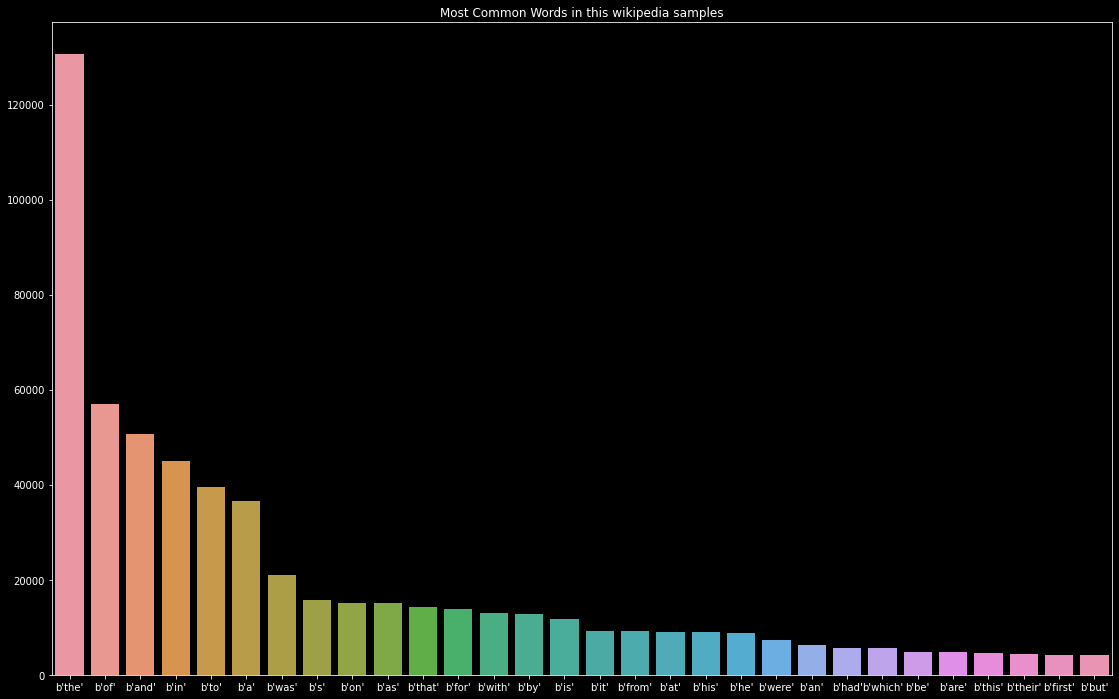

In [40]:
plt.style.use('dark_background')
plt.figure(figsize=(19, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

the is the most used word, this kind of words will be removed in the next part

# Suppression des stops words avec nltk

In [9]:
combined_strings = d_l.combine_first_strings(N_STRINGS)

In [9]:
combined_strings = d_l.combine_first_strings_all_ds(N_STRINGS)

In [10]:
combined_strings[:50]

'valkyria chronicles iii senj no valkyria unrecorde'

In [12]:
combined_strings_without_stopwords_split = d_l.without_stopwords(N_STRINGS)

In [13]:
combined_strings_without_stopwords_split[:6]

['valkyria', 'chronicles', 'iii', 'senj', 'valkyria', 'unrecorded']

cardinality_of_words can be replaced with Counter from collections

In [13]:
cardinalities = Counter(combined_strings_without_stopwords_split)

In [14]:
words = [cardinality[0] for cardinality in cardinalities.most_common(N_MOST_COMMON)]
counts = [cardinality[1] for cardinality in cardinalities.most_common(N_MOST_COMMON)]

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

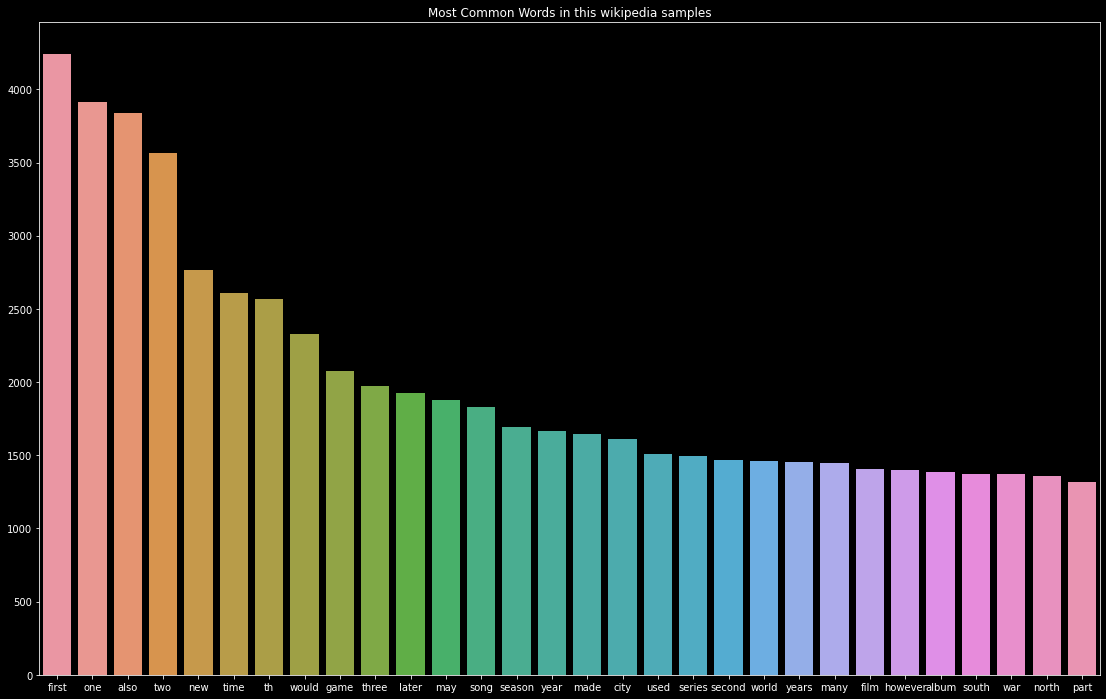

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(19, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

# Wordcloud

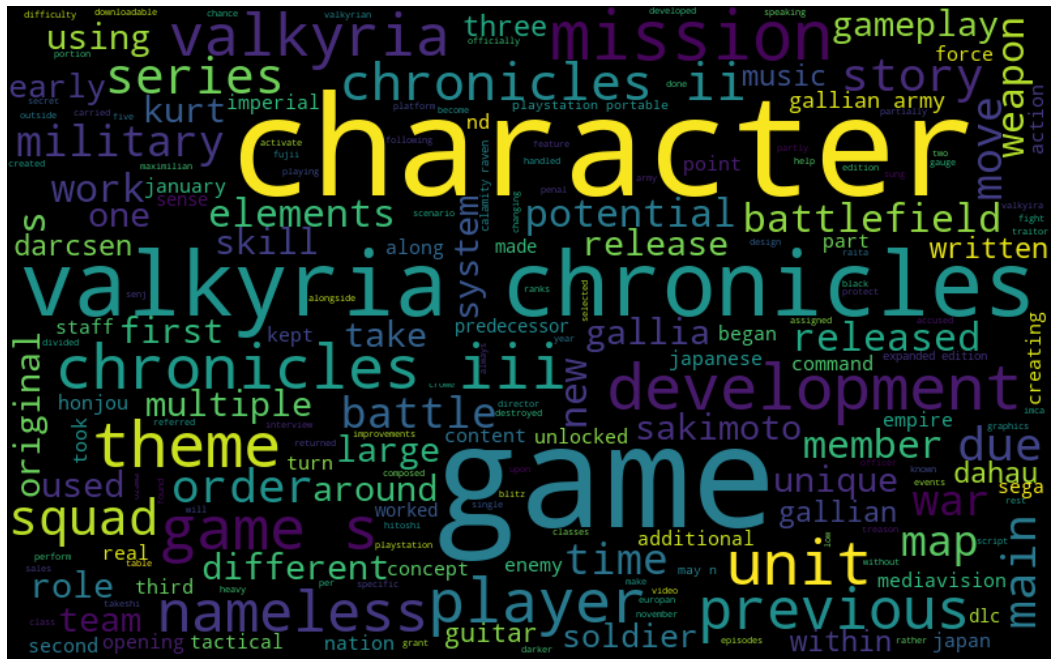

In [13]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(combined_strings)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

# Word2vec embedding